“Online-Exclusive-Rooms” or “OERs”
“hotel exclusive rooms” or “HERs”
<br><br>
<p>Q - общее количество номеров в отеле; 
<p>q - общее количество комнат отданное онлайн платформе (OERs); 
<p>Q-q - общее количество комнат отданное стойке регистрации (HERs);
<br><br>
<p>we - цена при бронировании номера через онлайн-платформу;
<p>wh - цена при бронировании номера на стойке регистрации; 
<p>r - комиссия, которую отель платит онлайн-платформе за успешное бронирование OER; комиссия пропорциональна цене бронирования на онлайн-платформе; 
<p>tet - соотношение цены бронирования и комиссии
<br><br>
<p>lam_h - скорость прибытия клиентов на стойку регистрации (подчиняется процессу Пуассона); независимо от цен бронирования; 
<p>lam_e - скорость прихода клиентов на онлайн-платформу (подчиняется процессу Пуассона); независимо от цен бронирования; 
<br><br>
<p>u - тариф на обслуживание в отеле (по общему разряду); таким образом 1\u - ожидаемое время пребывания клиента (дни) в отеле. 

In [1]:
from math import factorial as fact
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
Q = 100

q = 50
we = 200
wh = 180

tet = 0.2  #r/we

lam_h = 30
lam_e = 20 

u = 0.5
#u = 1/u

### Ph и Pe - вероятности того, что все номера будут заняты на стойке регистрации и на онлайн-платформе, соответственно, когда количество "OERs" равно q

In [3]:
Ph = (lam_h**(Q-q))/(u**(Q-q)*fact(Q-q))/(sum([lam_h**k/(u**k * fact(k)) for k in range(Q-q+1)]))
Ph

0.216118647823477

In [4]:
Pe = (lam_e**q)/(u**(q)*fact(q))/(sum([lam_e**k/(u**k * fact(k)) for k in range(q+1)]))
Pe

0.01869067110963225

### Lh и Le - ожидаемое количество клиентов в системе "HERs" и системе "ООР", соответственно

In [5]:
Lh = lam_h*(1 - Ph)/u
Lh

47.03288113059138

In [6]:
Le = lam_e*(1 - Pe)/u
Le

39.252373155614706

### Pi_h - ожидаемая выручка отеля 

In [7]:
def Pi_h_f(wh=wh, we=we, lam_h=lam_h, lam_e=lam_e, q=0, tet=tet, u=u):
    return \
        (wh*lam_h/u)*\
        (1 - (lam_h**(Q-q))/((u**(Q-q)*fact(Q-q))*(sum([lam_h**k/(u**k * fact(k)) \
                                                    for k in range(Q-q+1)])))) + \
        ((1-tet)*we*lam_e/u)*\
        (1 - (lam_e**q)/((u**(q)*fact(q))*(sum([lam_e**k/(u**k * fact(k)) \
                                                    for k in range(q+1)]))))

#Pi_h = wh*Lh + (1-tet)*we*Lh
Pi_h = wh*(lam_h*(1 - Ph)/u) + (1-tet)*we*(lam_e*(1 - Pe)/u)

Pi_h

14746.298308404801

#### График зависимости дохода отеля от количества комнат выделенных онлайн платформе

<AxesSubplot:xlabel='q', ylabel='Pi_h'>

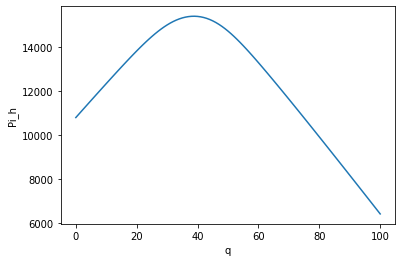

In [8]:
step = 1
df = pd.DataFrame() 
df['q'] = [q for q in range(0,101,step)]
df['Pi_h'] =[Pi_h_f(q=q)for q in range(0,101,step)]

sns.lineplot(data=df, x="q", y="Pi_h")

## Модель полного обмена

##### Pcom - вероятность того, что все комнаты будут заняты в случае «полного обмена» 

In [48]:
Pcom = ((lam_e+lam_h)**Q)/((u**Q)*fact(Q))/(sum([(lam_e+lam_h)**k/(u**k * fact(k)) \
                                                 for k in range(1, Q+1)]))
Pcom

0.07570045271086095

##### Pi_com - доход отеля в модели полного обмена

In [49]:
def Pcom_f(lam_e, lam_h, u):
    return ((lam_e+lam_h)**Q)/((u**Q)*fact(Q))/(sum([(lam_e+lam_h)**k/(u**k * fact(k)) \
                                                 for k in range(1, Q+1)]))
                                                 
def Pi_com_f(we=we, wh=wh, lam_e=lam_e, lam_h=lam_h, tet=tet, u=u):
    return (wh*lam_h+(1-tet)*we*lam_e)*(1-Pcom_f(lam_e, lam_h, u))/u

Pi_com = (wh*lam_h+(1-tet)*we*lam_e)*(1-Pcom)/u
Pi_com

15897.952213373192

## Чтобы выяснить, когда отель должен устанавливать ООР и когда отель должен делиться всеми ресурсами номеров с онлайн-платформой, мы проверяем относительную величину ожидаемого дохода отеля в случаях «настройка ООР» и «полное совместное использование». alpha = Pi_h(q*)/Pi_com

Когда alpha>1, отель более охотно устанавливает OER(четкое разделение).
<br><br>
И когда ,alpha<1 отель охотнее делится всеми ресурсами номеров с онлайн-платформой.

In [50]:
alpha = max(df['Pi_h'])/Pi_com
alpha

0.9702332629424955

In [51]:
from mpl_toolkits import mplot3d

##  Фактор стоимости бронирования (wh и we) 

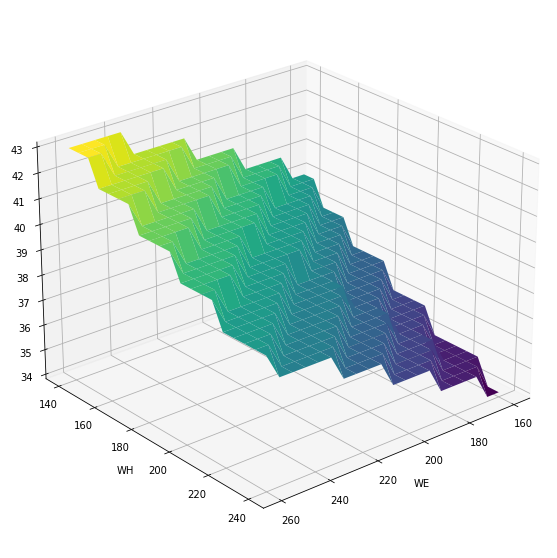

In [52]:
from matplotlib.pyplot import figure

we_ = np.linspace(160, 260, 20)
wh_ = np.linspace(140, 240, 20)

X, Y = np.meshgrid(we_, wh_)
Z = Pi_h_f(we=X, wh=Y, q=10)

Z_optimal = [[0 for i in range(len(Z))] for i in range(len(Z))]
q_optimal = [[-1 for i in range(len(Z))] for i in range(len(Z))]

for q_now in range(1, 100):
   for i in range(len(Z)):
        for j in range(len(Z)):
            if Z_optimal[i][j] < Pi_h_f(we=X[i][j], wh=Y[i][j], q=q_now):
                Z_optimal[i][j] = Pi_h_f(we=X[i][j], wh=Y[i][j], q=q_now)
                q_optimal[i][j] = q_now
   
Z = np.array(q_optimal)

figure(figsize=(10,10))

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("WE")
plt.ylabel("WH")

ax.view_init(25, 50) #  поворачиваем график
plt.show()

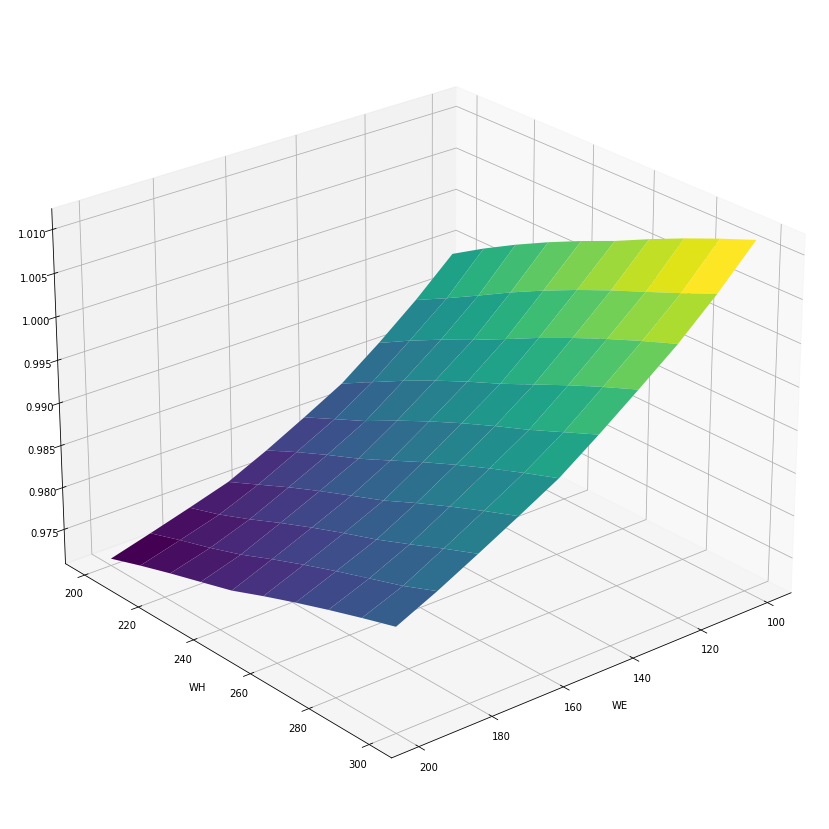

In [53]:
we_ = np.linspace(100, 200, 10)
wh_ = np.linspace(200, 300, 10)

X, Y = np.meshgrid(we_, wh_)
Z = Pi_h_f(we=X, wh=Y, q=10)

Z_optimal = [[0 for i in range(len(Z))] for i in range(len(Z))]

for q_now in range(1, 100, 2):
   for i in range(len(Z)):
        for j in range(len(Z)):
            if Z_optimal[i][j] < Pi_h_f(we=X[i][j], wh=Y[i][j], q=q_now):
                Z_optimal[i][j] = Pi_h_f(we=X[i][j], wh=Y[i][j], q=q_now)

Z = np.array(Z_optimal)

alpha = Z/Pi_com_f(we=X, wh=Y)

figure(figsize=(10,10))

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, alpha, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("WE")
plt.ylabel("WH")
ax.view_init(25, 50) #  поворачиваем график
plt.show()


## Фактор доли стоимости бронирования в качестве комиссии (tet)

<AxesSubplot:xlabel='tet', ylabel='q*'>

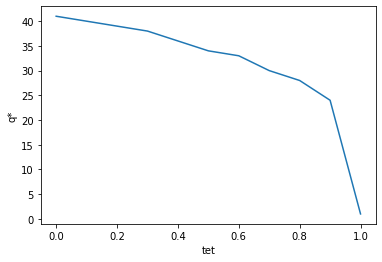

In [54]:
df = pd.DataFrame() 
df['tet'] = [tet_/10 for tet_ in range(11)]

Pi_optimal = [0 for _ in range(11)]
q_optimal = [0 for _ in range(11)]

for tet_ in range(11):
    for q_now in range(1, 100, 1):
        if Pi_optimal[tet_] < Pi_h_f(q=q_now, tet=tet_/10):
            Pi_optimal[tet_] = Pi_h_f(q=q_now, tet=tet_/10)
            q_optimal[tet_] = q_now

df['q*'] = q_optimal
    
sns.lineplot(data=df, x="tet", y="q*")

<AxesSubplot:xlabel='tet', ylabel='alpha'>

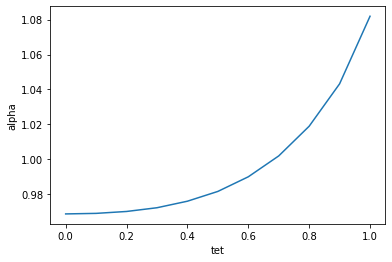

In [55]:
df = pd.DataFrame() 
df['tet'] = [tet_/10 for tet_ in range(11)]

Pi_optimal = [0 for i in range(11)]
q_optimal = [0 for i in range(11)]
Pi_com_optimal = [Pi_com_f(tet=tet_/10) for tet_ in range(11)]

for tet_ in range(11):
    for q_now in range(1, 100):
        if Pi_optimal[tet_] < Pi_h_f(q=q_now, tet=tet_/10, u=0.5): 
            Pi_optimal[tet_] = Pi_h_f(q=q_now, tet=tet_/10, u=0.5) 
            q_optimal[tet_]=q_now

df['alpha'] = [Pi_optimal[i]/Pi_com_optimal[i] for i in range(11)]
    
sns.lineplot(data=df, x="tet", y="alpha")


 ## Фактор скорости поступления клиентов (lam e и lam h) 

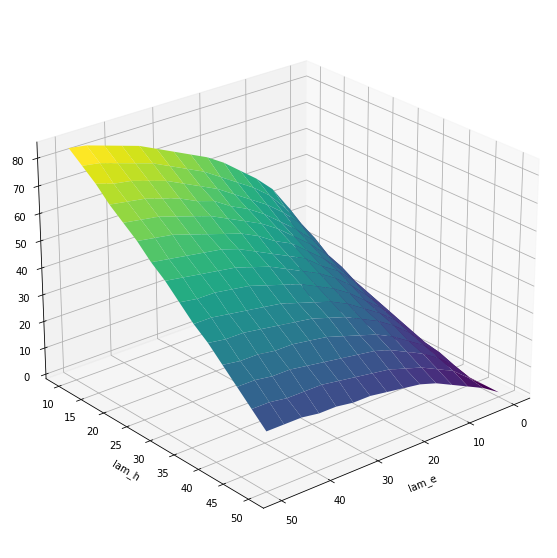

In [56]:
lam_e_ = np.linspace(0, 50, 15)
lam_h_ = np.linspace(10, 50, 15)

X, Y = np.meshgrid(lam_e_, lam_h_)
Z = Pi_h_f(X, Y)

Z_optimal = [[0 for i in range(len(Z))] for i in range(len(Z))]
q_optimal = [[0 for i in range(len(Z))] for i in range(len(Z))]

for q_now in range(100):
   for i in range(len(Z)):
        for j in range(len(Z)):
            if Z_optimal[i][j] < Pi_h_f(lam_e=X[i][j], lam_h=Y[i][j], q=q_now):
                Z_optimal[i][j] = Pi_h_f(lam_e=X[i][j], lam_h=Y[i][j], q=q_now)
                q_optimal[i][j] = q_now
   
Z = np.array(q_optimal)

figure(figsize=(10,10))

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("lam_e")
plt.ylabel("lam_h")

ax.view_init(25, 50) #  поворачиваем график
plt.show()


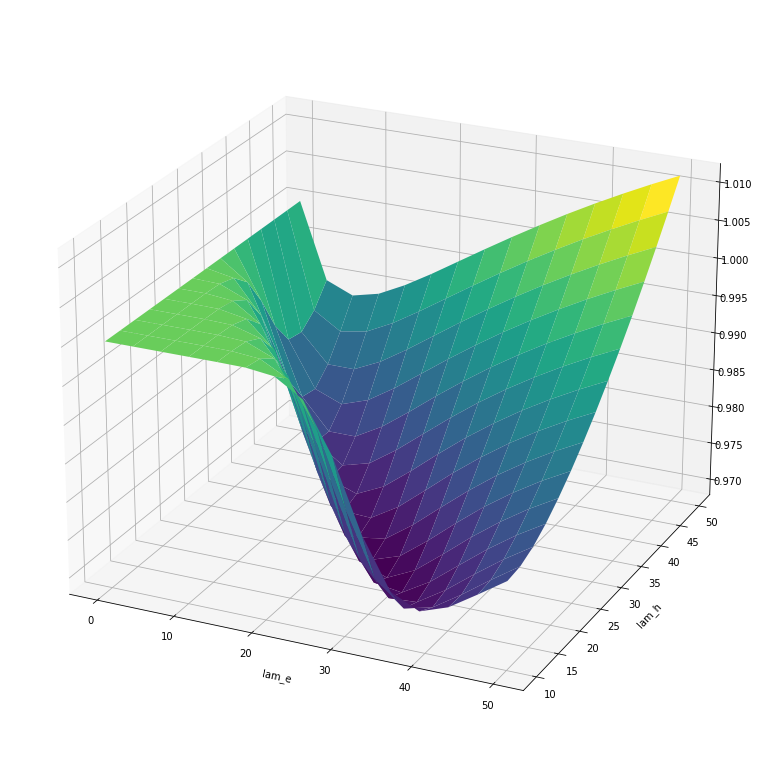

In [57]:
lam_e_ = np.linspace(0, 50, 15)
lam_h_ = np.linspace(10, 50, 15)

X, Y = np.meshgrid(lam_e_, lam_h_)
Z = Z_optimal / Pi_com_f(lam_e=X, lam_h=Y)
Z = np.array(Z)



figure(figsize=(14, 14))

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("lam_e")
plt.ylabel("lam_h")

ax.view_init(23, -90+25) #  поворачиваем график
plt.show()

## Фактор ожидаемого времени пребывания клиентов в отеле u 

<AxesSubplot:xlabel='1/u', ylabel='q*'>

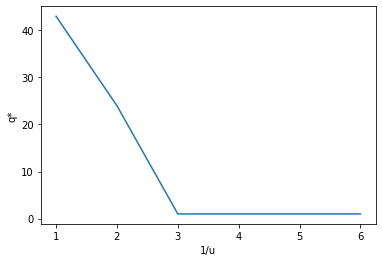

In [68]:
df = pd.DataFrame() 
df['1/u'] = [i for i in range(1, 7)]

Pi_optimal = [0 for _ in range(1, 7)]
q_optimal = [0 for _ in range(1, 7)]

for u_ in range(1, 7):
    for q_now in range(1, 100):
        if Pi_optimal[u_-1] < Pi_h_f(q=q_now, u=1/u_, lam_h=40, lam_e=30, wh=200, we=180): 
            Pi_optimal[u_-1] = Pi_h_f(q=q_now, u=1/u_, lam_h=40, lam_e=30, wh=200, we=180) 
            q_optimal[u_-1]=q_now


df['q*'] = q_optimal
    
sns.lineplot(data=df, x="1/u", y="q*")

<AxesSubplot:xlabel='1/u', ylabel='alpha'>

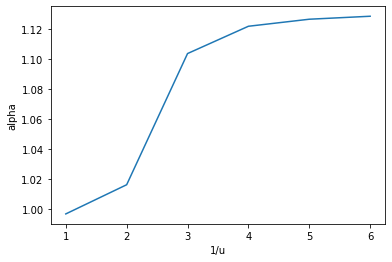

In [71]:
Pi_com_optimal = [Pi_com_f(u=1/i, wh=200, we=180, lam_h=40, lam_e=30) for i in range(1, 7)]
df['alpha'] = [Pi_optimal[i]/Pi_com_optimal[i] for i in range(len(Pi_com_optimal))]
sns.lineplot(data=df, x="1/u", y="alpha")